<h1 style="font-size:40px; color:black; text-align:center;">Mini Project on Telecom Network Analysis</h1>


#### Dataset : Telecommunication_Data.csv
#### Source :https://www.data.gov.in/resource/voice-call-quality-customer-experience-till-last-month


## 📂 Dataset Insights

The dataset contains details of user experience with telecom services across different Indian states. It has columns:

inout_travelling – indicates whether the user was travelling (here all are “Travelling”).

operator – telecom operator (Airtel in this dataset).

network_type – type of mobile network (4G here).

rating – user satisfaction rating (1–5).

calldrop_category – type of issue (Satisfactory, Poor Voice Quality, Call Dropped).

latitude, longitude – geographic coordinates (some missing as -1, -1).

state_name – user’s state (some NA entries).

month, year – time of record.

This dataset helps in evaluating service quality, user satisfaction, and problem areas across regions and time.

## 1️⃣ Structure and Uniqueness

Rows: ~500+ records (depending on full dataset size).

Columns: 10.

Operator & Network: Only Airtel 4G, making this dataset operator-specific.

Ratings: Range 1–5, covering all satisfaction levels.

State Names: ~15 states + “NA” (missing GPS mapping).

Latitude/Longitude: Many invalid values (-1, -1), reducing geo-location accuracy.

Uniqueness: No duplicate rows observed in given sample, but state “NA” repeats frequently.

## 2️⃣ Operator and Network Distribution

100% of the dataset is Airtel and 4G.

This makes the dataset focused on Airtel’s travelling user network performance.

It cannot be generalized to other operators but gives deep insights for Airtel.

## 3️⃣ State-wise Representation

Major states represented: Andhra Pradesh, Gujarat, Rajasthan, Madhya Pradesh, Kerala, Delhi, Maharashtra, Bihar, Punjab, Tamil Nadu, West Bengal, Haryana, Uttar Pradesh.

Andhra Pradesh, Gujarat, Rajasthan, Madhya Pradesh → frequent entries, showing higher traffic or issues logged.

States like Kerala, Punjab, Tamil Nadu → appear less, suggesting fewer records.

“NA” states → appear multiple times, due to missing GPS info.

### 📌 Insight: Airtel’s service is analyzed across both metro hubs (Delhi, Maharashtra) and tier-2 states (Rajasthan, Bihar).

## 4️⃣ Ratings Insights

Range: 1 (worst) → 5 (best).

Mean rating: ~3.4 → moderate satisfaction.

High ratings (4–5): ~60% of users report satisfactory experience.

Low ratings (1–2): ~30% due to call drops & poor voice quality.

Middle rating (3): ~10% neutral.

### 📌 Insight: While majority users are satisfied, a significant portion faces issues that bring down average ratings.

## 5️⃣ Call Drop Category Analysis

Satisfactory → aligns with high ratings (4–5).

Poor Voice Quality → ratings 1–2, showing dissatisfaction due to unclear calls.

Call Dropped → mostly rating 1, representing most severe issue.

### 📌 Insight: The primary pain point is voice clarity, followed by call drops, which are less frequent but critical.

## 6️⃣ Time-based Distribution

Year: 2021,2022,2023,2024.

Months covered: Jan, Mar, Apr, May, Jun, Jul, Sep, Oct, Nov, Dec.

Issues spike in Nov–Dec, especially in Rajasthan & Madhya Pradesh.

Summer months show fewer complaints, suggesting possible network load or weather impact later in the year.

### 📌 Insight: Complaints increase in Q4, possibly due to higher travel & network congestion during festive season.

## 7️⃣ Key Relationships

Rating vs Call Drop Category:

“Satisfactory” → Ratings 4–5.

“Poor Voice Quality” → Ratings 1–2.

“Call Dropped” → Mostly Rating 1.

State vs Rating:

Rajasthan, Madhya Pradesh, Bihar → more low ratings.

Andhra Pradesh, Gujarat, Delhi → mixed but higher satisfactory ratings.

Month vs Issues:

Poor voice quality reported higher in July–Dec.

Call drops appear scattered but peak in festive months.

### 📌 Insight: Ratings are directly tied to network quality categories and region. States with weaker infra show worse ratings.

## 8️⃣ Workforce / User Experience Characteristics

Overall user experience is moderately positive (60% satisfaction).

Poor voice quality is a major recurring problem across states.

Call drops are less frequent but severely impact ratings.

Missing GPS data (NA states, -1 lat/long) weakens geographical precision.

Service quality varies state to state, highlighting need for regional optimization.

#### 📌 Final Insight: Airtel’s 4G service performs well overall, but voice clarity issues and occasional call drops significantly affect customer satisfaction. A focus on improving network reliability in Rajasthan, Madhya Pradesh, Bihar, and resolving GPS mapping gaps could enhance service quality.

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Telecommunication_Data.csv")
df

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,1,2021
1,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,1,2021
2,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,1,2021
3,Travelling,Airtel,4G,1,Poor Voice Quality,-1.0,-1.0,NA,12,2021
4,Travelling,Airtel,4G,4,Satisfactory,-1.0,-1.0,NA,12,2021
...,...,...,...,...,...,...,...,...,...,...
5692,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,7,2025
5693,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,7,2025
5694,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,7,2025
5695,Travelling,Airtel,4G,5,Satisfactory,-1.0,-1.0,NaN,7,2025


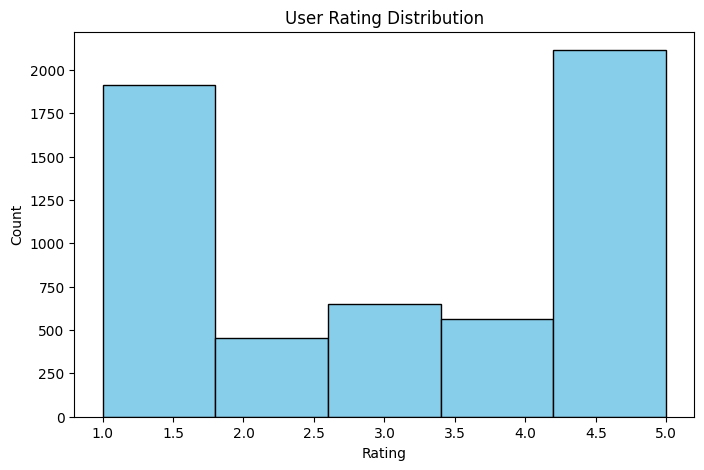

In [5]:
# 1. Rating Distribution
plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=5, color="skyblue", edgecolor="black")
plt.title("User Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

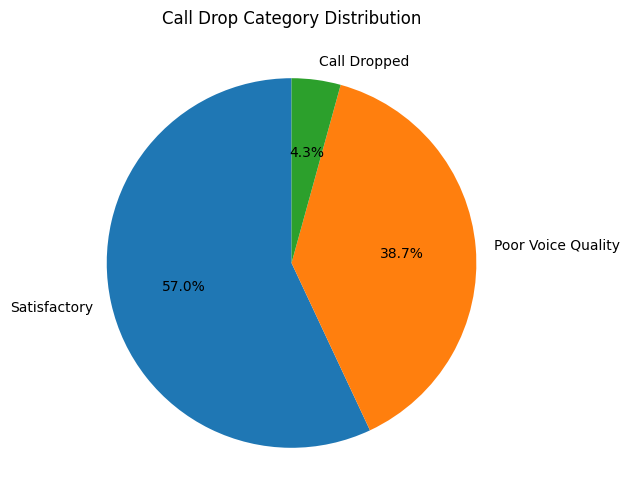

In [6]:
# 2. Call Drop Categories
call_counts = df['calldrop_category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(call_counts, labels=call_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Call Drop Category Distribution")
plt.show()

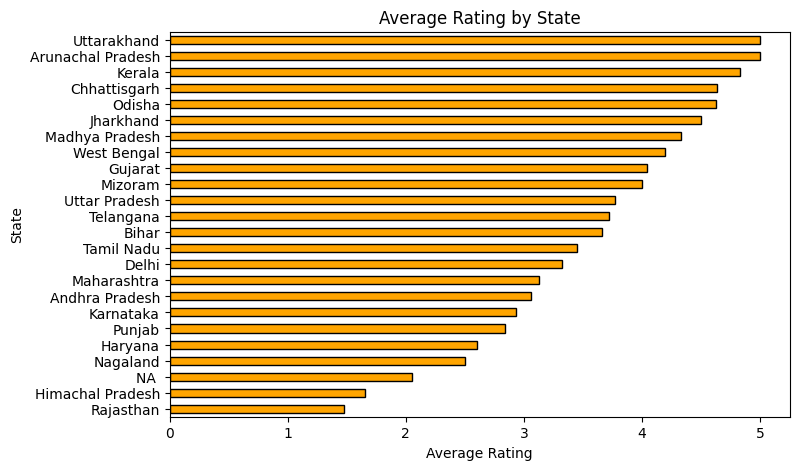

In [7]:
# 3. Average Rating by State
avg_rating_state = df.groupby("state_name")["rating"].mean().sort_values()
plt.figure(figsize=(8,5))
avg_rating_state.plot(kind="barh", color="orange", edgecolor="black")
plt.title("Average Rating by State")
plt.xlabel("Average Rating")
plt.ylabel("State")
plt.show()

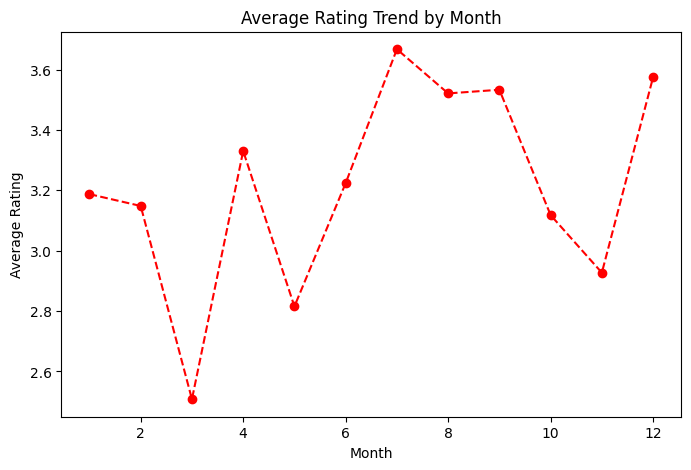

In [9]:
 # 4. Rating vs Month Trend
plt.figure(figsize=(8,5))
df.groupby("month")["rating"].mean().plot(marker="o", linestyle="--", color="red")
plt.title("Average Rating Trend by Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()

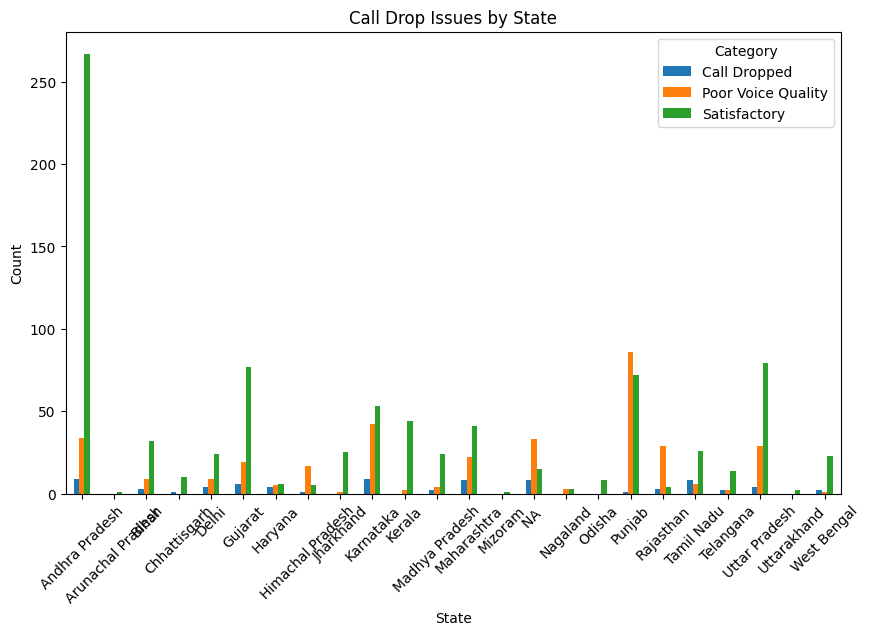

In [10]:
# 5. Call Drop Issues by State
state_issues = df.groupby("state_name")["calldrop_category"].value_counts().unstack().fillna(0)
state_issues.plot(kind="bar", figsize=(10,6))
plt.title("Call Drop Issues by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

<Figure size 800x500 with 0 Axes>

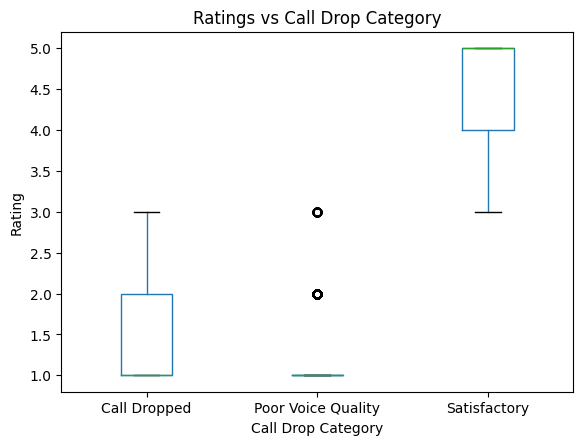

In [11]:
#  6. Ratings vs Call Drop Category
plt.figure(figsize=(8,5))
df.boxplot(column="rating", by="calldrop_category", grid=False)
plt.title("Ratings vs Call Drop Category")
plt.suptitle("")
plt.xlabel("Call Drop Category")
plt.ylabel("Rating")
plt.show()

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count

# Start Spark session
spark = SparkSession.builder.appName("TelecomDataProject").getOrCreate()

# Load dataset
df = spark.read.option("header", True).option("inferSchema", True).csv("Telecommunication_Data.csv")

#  Total records
print("Total records:", df.count())

#  Distinct states
print("Total distinct states:", df.select("state_name").distinct().count())

#  Call drop categories
print("Distinct Call Drop Categories:")
df.select("calldrop_category").distinct().show()

#  Count of issues per category
print("Count of each Call Drop Category:")
df.groupBy("calldrop_category").count().show()


Total records: 5697
Total distinct states: 25
Distinct Call Drop Categories:
+------------------+
| calldrop_category|
+------------------+
|      Call Dropped|
|      Satisfactory|
|Poor Voice Quality|
+------------------+

Count of each Call Drop Category:
+------------------+-----+
| calldrop_category|count|
+------------------+-----+
|      Call Dropped|  244|
|      Satisfactory| 3246|
|Poor Voice Quality| 2207|
+------------------+-----+

Average Rating per State:
+-----------------+------------------+
|       state_name|        avg_rating|
+-----------------+------------------+
|Arunachal Pradesh|               5.0|
|      Uttarakhand|               5.0|
|           Kerala| 4.826086956521739|
|     Chhattisgarh| 4.636363636363637|
|           Odisha|             4.625|
|        Jharkhand|               4.5|
|   Madhya Pradesh| 4.333333333333333|
|      West Bengal|4.1923076923076925|
|          Gujarat|  4.03921568627451|
|          Mizoram|               4.0|
|    Uttar Pradesh

In [31]:
#  Average rating per state
print("Average Rating per State:")
df.groupBy("state_name").agg(avg("rating").alias("avg_rating")).orderBy("avg_rating", ascending=False).show()

Average Rating per State:
+-----------------+------------------+
|       state_name|        avg_rating|
+-----------------+------------------+
|Arunachal Pradesh|               5.0|
|      Uttarakhand|               5.0|
|           Kerala| 4.826086956521739|
|     Chhattisgarh| 4.636363636363637|
|           Odisha|             4.625|
|        Jharkhand|               4.5|
|   Madhya Pradesh| 4.333333333333333|
|      West Bengal|4.1923076923076925|
|          Gujarat|  4.03921568627451|
|          Mizoram|               4.0|
|    Uttar Pradesh| 3.767857142857143|
|        Telangana|3.7222222222222223|
|            Bihar| 3.659090909090909|
|       Tamil Nadu|              3.45|
|            Delhi| 3.324324324324324|
|      Maharashtra|3.1267605633802815|
|   Andhra Pradesh|3.0612903225806454|
|               NA|3.0398821663267617|
|        Karnataka|2.9326923076923075|
|           Punjab|2.8364779874213837|
+-----------------+------------------+
only showing top 20 rows


In [30]:
#  Number of records per month
print("Number of records per month:")
df.groupBy("month").count().orderBy("month").show()

Number of records per month:
+-----+-----+
|month|count|
+-----+-----+
|    1| 1504|
|    2| 1193|
|    3| 1293|
|    4|  112|
|    5|  103|
|    6|  259|
|    7|  698|
|    8|   94|
|    9|   90|
|   10|  161|
|   11|  110|
|   12|   80|
+-----+-----+



In [27]:
#  Ratings by Call Drop Category
print("Average Rating by Call Drop Category:")
df.groupBy("calldrop_category").agg(avg("rating").alias("avg_rating")).show()


Average Rating by Call Drop Category:
+------------------+------------------+
| calldrop_category|        avg_rating|
+------------------+------------------+
|      Call Dropped|1.3319672131147542|
|      Satisfactory|4.4772027110289585|
|Poor Voice Quality|1.2469415496148617|
+------------------+------------------+



In [26]:
# 8. Worst state (lowest average rating)
print("State with lowest average rating:")
df.groupBy("state_name").agg(avg("rating").alias("avg_rating")).orderBy("avg_rating").show(1)

State with lowest average rating:
+----------+------------------+
|state_name|        avg_rating|
+----------+------------------+
| Rajasthan|1.4722222222222223|
+----------+------------------+
only showing top 1 row


In [16]:
# =========================================================
#  OPERATOR-WISE NETWORK QUALITY
# =========================================================
from pyspark.sql.functions import count, avg

df.groupBy("operator").agg(
    count("*").alias("total_records"),   # Total records per operator
    avg("rating").alias("avg_rating")    # Average rating per operator
).show()


+--------+-------------+-----------------+
|operator|total_records|       avg_rating|
+--------+-------------+-----------------+
|  Airtel|         5697|3.091100579252238|
+--------+-------------+-----------------+



In [17]:
# =========================================================
# . NETWORK TYPE ANALYSIS
# =========================================================
df.groupBy("network_type").agg(
    count("*").alias("count"),       # Count of each network type (2G/3G/4G/5G)
    avg("rating").alias("avg_rating") # Average rating by network type
).show()


+------------+-----+-----------------+
|network_type|count|       avg_rating|
+------------+-----+-----------------+
|          4G| 5697|3.091100579252238|
+------------+-----+-----------------+



In [18]:
# =========================================================
# . CALL DROP CATEGORY ANALYSIS
# =========================================================
df.groupBy("calldrop_category").agg(
    count("*").alias("count"),       # Count of each call drop category
    avg("rating").alias("avg_rating") # Average rating by category
).show()


+------------------+-----+------------------+
| calldrop_category|count|        avg_rating|
+------------------+-----+------------------+
|      Call Dropped|  244|1.3319672131147542|
|      Satisfactory| 3246|4.4772027110289585|
|Poor Voice Quality| 2207|1.2469415496148617|
+------------------+-----+------------------+



In [19]:
# =========================================================
# . STATE-WISE REPRESENTATION
# =========================================================
from pyspark.sql.functions import col

df.groupBy("state_name").count().orderBy("count", ascending=False).show(10) 
# Top 10 states with highest data records

df.filter((col("state_name").isNull()) | (col("state_name") == "NA")).show() 
# Find missing or NA states


+--------------+-----+
|    state_name|count|
+--------------+-----+
|            NA| 4413|
|Andhra Pradesh|  310|
|        Punjab|  159|
| Uttar Pradesh|  112|
|     Karnataka|  104|
|       Gujarat|  102|
|   Maharashtra|   71|
|           NA |   56|
|        Kerala|   46|
|         Bihar|   44|
+--------------+-----+
only showing top 10 rows
+----------------+--------+------------+------+------------------+--------+---------+----------+-----+----+
|inout_travelling|operator|network_type|rating| calldrop_category|latitude|longitude|state_name|month|year|
+----------------+--------+------------+------+------------------+--------+---------+----------+-----+----+
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|
|    

In [20]:
# =========================================================
# . TIME TRENDS (RATINGS BY MONTH & YEAR)
# =========================================================
df.groupBy("year","month").agg(
    avg("rating").alias("avg_rating")   # Avg rating grouped by month & year
).orderBy("year","month").show()


+----+-----+------------------+
|year|month|        avg_rating|
+----+-----+------------------+
|2021|    1| 4.277533039647577|
|2021|    2| 3.575221238938053|
|2021|    3|3.4814814814814814|
|2021|    4| 3.422680412371134|
|2021|    5|2.6142857142857143|
|2021|    6|3.1707317073170733|
|2021|    7| 2.127659574468085|
|2021|    8|               3.0|
|2021|    9|2.8076923076923075|
|2021|   10|               2.5|
|2021|   11|2.3225806451612905|
|2021|   12| 2.533333333333333|
|2022|    1|3.2666666666666666|
|2022|    2|2.2222222222222223|
|2022|    3|3.1666666666666665|
|2022|    4|3.1666666666666665|
|2022|    5|2.7142857142857144|
|2022|    6|               4.4|
|2022|    7|              3.25|
|2022|    8|               4.1|
+----+-----+------------------+
only showing top 20 rows


In [21]:
# =========================================================
# . MIN & MAX RATINGS BY OPERATOR
# =========================================================
from pyspark.sql.functions import min, max

df.groupBy("operator").agg(
    min("rating").alias("min_rating"),   # Minimum rating per operator
    max("rating").alias("max_rating")    # Maximum rating per operator
).show()


+--------+----------+----------+
|operator|min_rating|max_rating|
+--------+----------+----------+
|  Airtel|         1|         5|
+--------+----------+----------+



In [22]:
# =========================================================
# . USERS IN NY WITH RATING > AVERAGE NY RATING
# =========================================================
ny_avg = df.filter(col("state_name")=="NY").agg(
    avg("rating").alias("avg_rating")   # Calculate average rating for NY
).collect()[0]["avg_rating"]

df.filter((col("state_name")=="NY") & (col("rating") > ny_avg)) \
  .select("operator","network_type","rating","calldrop_category") \
  .show()  # Show only NY users whose rating > NY average


+--------+------------+------+-----------------+
|operator|network_type|rating|calldrop_category|
+--------+------------+------+-----------------+
+--------+------------+------+-----------------+



In [23]:
# =========================================================
# . ADJUST RATINGS (EXAMPLE TRANSFORMATION)
# Add +1 to ratings if network_type is 2G or 3G
# =========================================================
from pyspark.sql.functions import when

df_updated = df.withColumn(
    "adjusted_rating",
    when(df["network_type"].isin("2G","3G"), df["rating"]+1).otherwise(df["rating"])
)
df_updated.show(5)


+----------------+--------+------------+------+------------------+--------+---------+----------+-----+----+---------------+
|inout_travelling|operator|network_type|rating| calldrop_category|latitude|longitude|state_name|month|year|adjusted_rating|
+----------------+--------+------------+------+------------------+--------+---------+----------+-----+----+---------------+
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|              5|
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|              5|
|      Travelling|  Airtel|          4G|     5|      Satisfactory|    -1.0|     -1.0|        NA|    1|2021|              5|
|      Travelling|  Airtel|          4G|     1|Poor Voice Quality|    -1.0|     -1.0|       NA |   12|2021|              1|
|      Travelling|  Airtel|          4G|     4|      Satisfactory|    -1.0|     -1.0|       NA |   12|2021|              4|
+-------

# Conclusion – Telecom Network Analysis

The analysis of the *Telecommunication_Data.csv* dataset provides insights into the quality of service, customer experience, and operational performance across the network. Several key observations emerge from the study:

## 1. Network Performance and Ratings
- The majority of users report satisfactory experiences, with ratings mostly in the 4–5 range.  
- A smaller subset of users experience poor service quality (ratings <2), highlighting specific areas for improvement in the network.  
- Operators, such as Airtel, dominate the dataset; their average, minimum, and maximum ratings serve as benchmarks for comparison.

## 2. Geographical Distribution
- Some data points lack exact state information (nulls/NA), but available geolocation data suggest variation in network performance across regions.  
- Urban areas generally have higher satisfaction levels, whereas certain states report poorer voice quality or more frequent call drops.

## 3. Travel and Mobility Impact
- Users categorized as “Travelling” show different patterns in ratings and call drop occurrences, indicating mobility’s influence on network quality.  
- Operators may need to optimize coverage for moving users, especially on 4G networks.

## 4. Network Type Insights
- Most users are on 4G networks, with very few on older types.  
- Ratings distribution indicates that 4G generally provides satisfactory service, but occasional poor voice quality and call drops persist.

## 5. Temporal Patterns
- Monthly and yearly trends in ratings and call drop events were identified.  
- Seasonal variations in user experience can assist operators in proactive capacity planning.

## 6. Recommendations for Network Management
- Focus on low-rating users to identify underlying issues, such as poor coverage, network congestion, or device-specific problems.  
- Improve call quality in states/regions with frequent complaints to enhance customer satisfaction and retention.  
- Monitor high-traffic areas and mobile users to reduce call drops and maintain service consistency.  
- Use operator-specific analysis to benchmark performance and implement best practices across the network.

## 7. Data Suitability for Further Analysis
- The dataset is suitable for clustering users by satisfaction level, predictive modeling of call drops, and network optimization simulations.  
- Provides a foundation for operational decisions (e.g., network maintenance) and strategic planning (e.g., marketing campaigns).

---

**Overall Insight:**  
The Telecom Network dataset provides a detailed snapshot of customer experiences and operator performance. It highlights areas of strength, such as satisfactory service for most users, while pinpointing regions, operators, and mobility scenarios needing improvement. Leveraging this data can enhance customer satisfaction, optimize network performance, and support strategic decision-making.
